In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("student_habits_performance_changed.csv")

In [3]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [4]:
df['passed'] = np.where(df['exam_score'] >= 50, 1, 0)

In [13]:
def sigmoid(z):
    # stable sigmoid using np.clip
    z = np.clip(z, -1000, 1000)
    return 1 / (1 + np.exp(-z))

In [18]:
def gradient_descent_fast(w, b, alpha, X, y):
    n = len(X)
    
    # compute z
    z = w * X + b
    
    # stable sigmoid
    y_pred = sigmoid(z)
    
    # gradients
    error = y_pred - y
    w_d = (1/n) * np.dot(X, error)
    b_d = (1/n) * np.sum(error)
    
    # update
    w -= alpha * w_d
    b -= alpha * b_d
    
    return w, b


In [42]:
no_steps = 10000
X = df['study_hours_per_day'].values
y = df['exam_score'].values
w, w_old = 0, 1
b, b_old = 0, 1
eps = 0.01
alpha = 0.1

In [50]:
for step in range(no_steps):
    w_old, b_old = w, b
    w, b = gradient_descent_fast(w, b, alpha, X, y)
    if abs(w - w_old) < eps and abs(b - b_old) < eps:
        break
print('final result')
print(w, b)

final result
2111986.0175027023 548812.0500018343


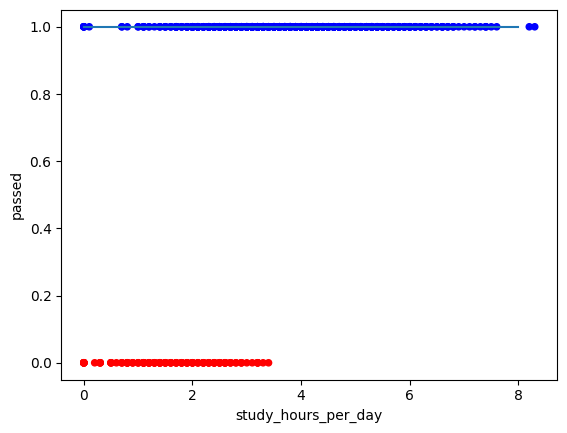

In [38]:
x_function = np.linspace(0, 8, 100)
y_function = sigmoid(w*x_function + b)

ax = df.plot.scatter(x='study_hours_per_day', y='passed', 
               c=df['passed'].map({1: 'blue', 0: 'red'}))
ax.plot(x_function, y_function)